<a href="https://colab.research.google.com/github/RamanGupta16/ML/blob/master/EVA_Ph1/Session4/Session4_4th_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Session4 4th DNN 
# Additions on top of 3rd DNN
# 1. Learning Rate  Scheduler

# Modifications on top of 3rd DNN
# 1. Epochs = 50
# 2. Batch Size = 384

# Reduced parameters to 9,424

# RESULTS SUMMARY
# Parameters: 9,424
# final 99.43 best validation accuracy in epoch 31

In [0]:
# Comments:
# Install keras onto colab VM 
# Import numpy package
# Import keras models, layers, convolution, dropout
# Import MNIST dataset
#

# https://keras.io/
!pip install -q keras

import keras
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

(60000, 28, 28)


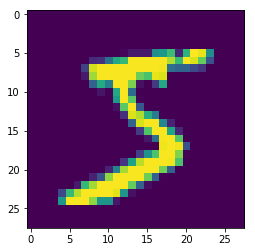

In [14]:
# Comments:
# 1. Load MNIST dataset. It loads both Training and Test datasets
# 2. Training set has 60,000 image samples. X_train are images and y_train is label of images
# 3. Test set of 10,000 image samples. y_test are images and y_train is label of images
# 

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Comments:
# 1. Training set has 60,000 image samples of size 28x28 pixels
# 2. Show '5' hand written digit image
#
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
# Comments:
# 1. Reshape the 60,000 training data with channel dimenison as 1. So each image is 28x28x1 dimension
# 2. Reshape the 10,000 test data with channel dimenison as 1. So each image is 28x28x1 dimension
#

X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

# Comments:
# 1. Divide training data by 255 so that pixels become float values betwee 0..1
# 2. Divide test data by 255 so that pixels become float values betwee 0..1
#

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [16]:
# Comments:
# 1. Print the first 10 labels of training data
#
y_train[:10]

# Comments:
# 1. Convert 1-dimensional train and test labels into one-hot vector of floats
#    where only 1 value in vector is high(hot) indicating the label of image.
#    Eaxmple [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.] ==> 5

# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

# Comments:
# 1. Print the first 10 training label as one-hot vectors.
#    Eaxmple [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.] ==> 5

Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [75]:
# Comments:
# 1. Create the model
# 2. Add convolution Layers


from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(12, 3, 3, activation='relu', input_shape=(28,28,1))) # 26x26, RF 3x3
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu')) #  24x24, 5x5
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2))) # 12x12, 14x14

model.add(Convolution2D(8, 1, 1, activation='relu')) # 12x12, 14x14
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(12, 3, 3, activation='relu')) # 10x10, 16x16
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu')) # 8x8, 18x18
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(8, 1, 1, activation='relu')) # 8x8, 18x18
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 3, 3, activation='relu')) # 6x6, 20x20
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 6, 6, activation='relu')) # 3x3, 22x22

model.add(Flatten())
model.add(Activation('softmax'))

# Summarize the model
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (1, 1), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Up

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_228 (Conv2D)          (None, 26, 26, 12)        120       
_________________________________________________________________
batch_normalization_203 (Bat (None, 26, 26, 12)        48        
_________________________________________________________________
dropout_203 (Dropout)        (None, 26, 26, 12)        0         
_________________________________________________________________
conv2d_229 (Conv2D)          (None, 24, 24, 16)        1744      
_________________________________________________________________
batch_normalization_204 (Bat (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_204 (Dropout)        (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 12, 12, 16)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (6, 6), activation="relu")`


In [104]:
from keras.optimizers import Adam, SGD
from keras.callbacks import LearningRateScheduler

# Learning Rate Scheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

# Compile with Adam and initial LR=0.003
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])


# Comments:
# 1. Train the model for with LearningRateScheduler

model.fit(X_train, Y_train, batch_size=384, epochs=50, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])


Train on 60000 samples, validate on 10000 samples
Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 22s 359us/step - loss: 0.0155 - acc: 0.9947 - val_loss: 0.0254 - val_acc: 0.9937
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 3s 55us/step - loss: 0.0133 - acc: 0.9958 - val_loss: 0.0263 - val_acc: 0.9932
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 3s 55us/step - loss: 0.0129 - acc: 0.9956 - val_loss: 0.0306 - val_acc: 0.9920
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 3s 56us/step - loss: 0.0127 - acc: 0.9956 - val_loss: 0.0277 - val_acc: 0.9929
Epoch 5/50

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [========

In [105]:
# Comments:
# 1. Evaluate the trained model on test dataset
# 2. Print evaluated validation accuracy score.

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.02527835911239722, 0.9935]


In [0]:
# Comments:
# 1. Generate the predictions for the test dataset.
# 2. These predictions are in 1-hot vector format
#

y_pred = model.predict(X_test)

In [107]:
# Comments:
# 1. Print the first 9 Predictions
# 2. Only prediction for digit 4 are correct rest are wrong.
# 3. Correct predictions for digit 4:
#    [0.  0.  0.  0.  1.  0.  0.  0.  0.  0. ]
#    [0.  0.  0.  0.  1.  0.  0.  0.  0.  0. ]
#

print(y_pred[:9])
print(y_test[:9])

[[9.4483554e-10 9.4483554e-10 9.4483554e-10 9.4483554e-10 9.4483554e-10
  9.4483554e-10 9.4483554e-10 1.0000000e+00 9.4483554e-10 2.2057220e-09]
 [1.0973044e-09 1.5965745e-09 1.0000000e+00 1.9125979e-11 1.9125979e-11
  1.9125979e-11 3.1452571e-10 1.9125979e-11 1.9125979e-11 1.9125979e-11]
 [8.2178771e-11 1.0000000e+00 8.2178771e-11 8.2178771e-11 7.0735084e-10
  8.2178771e-11 1.5422751e-10 3.2886793e-09 8.2178771e-11 8.2178771e-11]
 [9.9999976e-01 1.0612755e-10 1.0612755e-10 1.0612755e-10 1.0612755e-10
  1.0612755e-10 2.8312144e-07 1.0612755e-10 1.7497116e-09 5.9051558e-10]
 [1.4603388e-10 1.4603388e-10 1.4603388e-10 1.4603388e-10 1.0000000e+00
  1.4603388e-10 1.4603388e-10 1.4603388e-10 1.4603388e-10 7.0891124e-09]
 [1.3994740e-10 1.0000000e+00 1.3994740e-10 1.3994740e-10 3.3054370e-10
  1.3994740e-10 1.9600435e-10 2.9953995e-09 1.3994740e-10 1.3994740e-10]
 [7.7809137e-09 4.7592133e-07 7.7809137e-09 7.7809137e-09 9.9999869e-01
  7.7809137e-09 7.7809137e-09 3.2187035e-07 1.0971654e-08 

In [108]:
# Comment
# Create Layer dictionary

layer_dict = dict([(layer.name, layer) for layer in model.layers])
print(layer_dict)

{'conv2d_228': <keras.layers.convolutional.Conv2D object at 0x7f2391d7b828>, 'batch_normalization_203': <keras.layers.normalization.BatchNormalization object at 0x7f2391d7b4a8>, 'dropout_203': <keras.layers.core.Dropout object at 0x7f23922d59e8>, 'conv2d_229': <keras.layers.convolutional.Conv2D object at 0x7f23922d5cf8>, 'batch_normalization_204': <keras.layers.normalization.BatchNormalization object at 0x7f2391d7b2e8>, 'dropout_204': <keras.layers.core.Dropout object at 0x7f2391c55d30>, 'max_pooling2d_29': <keras.layers.pooling.MaxPooling2D object at 0x7f2391b85978>, 'conv2d_230': <keras.layers.convolutional.Conv2D object at 0x7f2391c8d550>, 'batch_normalization_205': <keras.layers.normalization.BatchNormalization object at 0x7f2391bd49b0>, 'dropout_205': <keras.layers.core.Dropout object at 0x7f2391ad06a0>, 'conv2d_231': <keras.layers.convolutional.Conv2D object at 0x7f2391ad0e80>, 'batch_normalization_206': <keras.layers.normalization.BatchNormalization object at 0x7f2391bebe80>, 'd

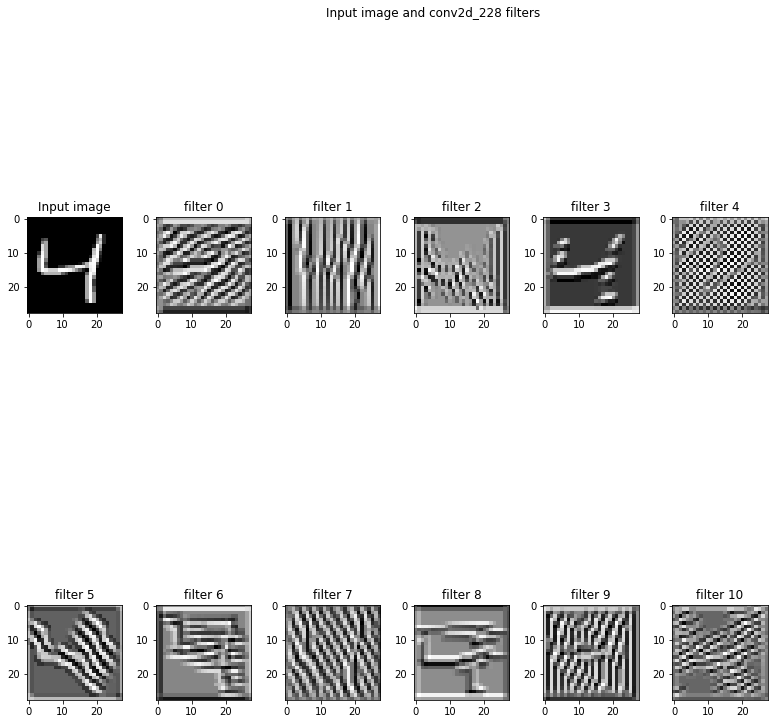

In [110]:
# Comment
# Visualize image in filter

import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline

# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_228'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()